## Import libraries

In [26]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Create a directory to store data

In [27]:
isExist = os.path.exists('./temp1')
if isExist == True:
    exit
else:
    os.mkdir('./temp1')

## Read the file that contains information about SNOTEL sites

In [28]:
SNOTEL_info = pd.read_csv('./NRCS_SNOTEL_Locations_noAlaska.csv')

In [29]:
set(SNOTEL_info['State'])

{'AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'SD', 'UT', 'WA', 'WY'}

## Define parameters

In [50]:
StartDate = '2022'
EndDate = '2023'
State = 'ID'
Names = list(SNOTEL_info[SNOTEL_info['State']==State]['Station Name'].values)
IDs = list(SNOTEL_info[SNOTEL_info['State']==State]['Station ID'].values)
Lat = list(SNOTEL_info[SNOTEL_info['State'] ==State]['Latitude'].values)
Lon = list(SNOTEL_info[SNOTEL_info['State'] ==State]['Longitude'].values)

In [51]:
SNOTEL = pd.DataFrame({'Name':Names, 'ID':IDs, 'Latitude':Lat, 'Longitude':Lon})
SNOTEL['State'] = State

#### For CALIFORNIA, turn on the following lines:
### It seems the site name changed from "Squaw Valley G.C." to "Palisades Tahoe "
# SNOTEL.loc[SNOTEL['ID']==784, 'Name']="Palisades Tahoe"

# ### For UTAH, turn on the following lines:
# ## There is two space between the terms on the website (if opening the url)
# SNOTEL.loc[SNOTEL['ID']==763, 'Name']="Smith  Morehouse"
# print(SNOTEL[SNOTEL['ID']==763]['Name']=='Smith  Morehouse')

SNOTEL

,Name,ID,Latitude,Longitude,State
0,Atlanta Summit,306,43.75690,-115.23907,ID
1,Banner Summit,312,44.30342,-115.23447,ID
2,Bear Basin,319,44.95222,-116.14293,ID
3,Bear Canyon,320,43.74367,-113.93797,ID
4,Bear Mountain,323,48.30577,-116.07448,ID
...,...,...,...,...,...
77,Vienna Mine,845,43.79942,-114.85273,ID
78,West Branch,855,45.07220,-116.45413,ID
79,White Elephant,860,44.53267,-111.41085,ID
80,Wildhorse Divide,867,42.75743,-112.47783,ID


In [52]:
Required = SNOTEL[(SNOTEL['Latitude'] >= 42.80) & (SNOTEL['Longitude'] > -116)]

Required

,Name,ID,Latitude,Longitude,State
0,Atlanta Summit,306,43.75690,-115.23907,ID
1,Banner Summit,312,44.30342,-115.23447,ID
3,Bear Canyon,320,43.74367,-113.93797,ID
6,Big Creek Summit,338,44.62621,-115.79561,ID
10,Camas Creek Divide,382,43.26548,-115.34530,ID
11,Chocolate Gulch,895,43.76850,-114.41812,ID
12,Cool Creek,411,46.76361,-115.29528,ID
13,Cozy Cove,423,44.28846,-115.65508,ID
14,Crab Creek,424,44.43700,-111.99384,ID
15,Crater Meadows,425,46.56394,-115.28903,ID


## Retrieve data by calling getData.py script
The python script retrieves the following variable:
- PREC: PRECIPITATION ACCUMULATION
- PRCP: PRECIPITATION INCREMENT
- PRCPSA: PRECIPITATION INCREMENT – SNOW-ADJUSTED
- WTEQ: SNOW WATER EQUIVALENT
- SNRR: SNOW RAIN RATIO
If you need other variables, please visit https://wcc.sc.egov.usda.gov/reportGenerator/ and https://www.wcc.nrcs.usda.gov/web_service/AWDB_Web_Service_Reference.htm, and make corresponding changes the python script.  

The script also re-calculates SNRR based on snow-adjusted precipitation data because the original SNRR is calculated using unadjusted precipitation. 


In [53]:
for i in SNOTEL.index:
    !python getData.py "{SNOTEL['Name'][i]}" {SNOTEL['ID'][i]} {SNOTEL['State'][i]} {StartDate} {EndDate}

Start retrieving data for Atlanta Summit, 306
Start retrieving data for Banner Summit, 312
Start retrieving data for Bear Basin, 319
Start retrieving data for Bear Canyon, 320
Start retrieving data for Bear Mountain, 323
Start retrieving data for Bear Saddle, 324
Start retrieving data for Big Creek Summit, 338
Start retrieving data for Bogus Basin, 978
Start retrieving data for Bostetter R.S., 359
Start retrieving data for Brundage Reservoir, 370
Start retrieving data for Camas Creek Divide, 382
Start retrieving data for Chocolate Gulch, 895
Start retrieving data for Cool Creek, 411
Start retrieving data for Cozy Cove, 423
Start retrieving data for Crab Creek, 424
Start retrieving data for Crater Meadows, 425
Start retrieving data for Deadwood Summit, 439
Start retrieving data for Dollarhide Summit, 450
Start retrieving data for Elk Butte, 466
Start retrieving data for Emigrant Summit, 471
Start retrieving data for Franklin Basin, 484
Start retrieving data for Galena, 489
Start retriev

## Move CSV files to the directory that was created earlier

In [54]:
!mv ./df_*.csv ./temp1/

## Combie all CSV files into one

In [55]:
all_filenames = [i for i in glob.glob(f"./temp1/df*.csv")]
all_filenames
combined_csv_data = pd.concat([pd.read_csv(f) for f in all_filenames], sort=False)
combined_csv_data.reset_index(inplace=True, drop=True)
combined_csv_data

,Date,Cool Creek (411) Precipitation Accumulation (in) Start of Day Values,Cool Creek (411) Precipitation Increment (in),Cool Creek (411) Precipitation Increment - Snow-adj (in),Cool Creek (411) Snow Water Equivalent (in) Start of Day Values,Cool Creek (411) Snow Rain Ratio (unitless),SiteID,Water_Year,CALCULATED Precipitation Accumulation (in),CALCULATED Snow Adjusted Precipitation Accumulation (in),...,Mica Creek (623) Precipitation Accumulation (in) Start of Day Values,Mica Creek (623) Precipitation Increment (in),Mica Creek (623) Precipitation Increment - Snow-adj (in),Mica Creek (623) Snow Water Equivalent (in) Start of Day Values,Mica Creek (623) Snow Rain Ratio (unitless),Mores Creek Summit (637) Precipitation Accumulation (in) Start of Day Values,Mores Creek Summit (637) Precipitation Increment (in),Mores Creek Summit (637) Precipitation Increment - Snow-adj (in),Mores Creek Summit (637) Snow Water Equivalent (in) Start of Day Values,Mores Creek Summit (637) Snow Rain Ratio (unitless)
0,2022-10-01,0.0,0.0,0.0,0.0,NaN,411,2023,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-02,0.0,0.0,0.0,0.0,NaN,411,2023,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-03,0.0,0.0,0.0,0.0,NaN,411,2023,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-04,0.0,0.0,0.0,0.0,NaN,411,2023,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-05,0.0,0.0,0.0,0.0,NaN,411,2023,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,2023-07-14,NaN,NaN,NaN,NaN,NaN,637,2023,44.3,51.5,...,NaN,NaN,NaN,NaN,NaN,44.3,0.0,0.0,0.0,NaN
23567,2023-07-15,NaN,NaN,NaN,NaN,NaN,637,2023,44.3,51.5,...,NaN,NaN,NaN,NaN,NaN,44.3,0.0,0.0,0.0,NaN
23568,2023-07-16,NaN,NaN,NaN,NaN,NaN,637,2023,44.3,51.5,...,NaN,NaN,NaN,NaN,NaN,44.3,0.0,0.0,0.0,NaN
23569,2023-07-17,NaN,NaN,NaN,NaN,NaN,637,2023,44.3,51.5,...,NaN,NaN,NaN,NaN,NaN,44.3,0.0,0.0,0.0,NaN


In [73]:
df_306 = pd.read_csv('./temp1/df_306.csv')

In [78]:
df = df_306[(df_306['Date'] >= '2022-12-01') & (df_306['Date'] <= '2023-03-01')]

In [79]:
df

,Date,Atlanta Summit (306) Precipitation Accumulation (in) Start of Day Values,Atlanta Summit (306) Precipitation Increment (in),Atlanta Summit (306) Precipitation Increment - Snow-adj (in),Atlanta Summit (306) Snow Water Equivalent (in) Start of Day Values,Atlanta Summit (306) Snow Rain Ratio (unitless),SiteID,Water_Year,CALCULATED Precipitation Accumulation (in),CALCULATED Snow Adjusted Precipitation Accumulation (in),OBSERVED Snow Rain Ratio (unitless)
61,2022-12-01,7.8,1.1,1.3,7.3,118.0,306,2023,9.2,10.6,1.0
62,2022-12-02,8.9,0.0,0.0,8.6,NaN,306,2023,9.2,10.6,NaN
63,2022-12-03,8.9,0.3,0.3,8.6,0.0,306,2023,9.5,10.9,0.0
64,2022-12-04,9.2,0.8,0.8,8.6,100.0,306,2023,10.3,11.7,1.0
65,2022-12-05,10.0,0.0,0.0,9.4,NaN,306,2023,10.3,11.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
147,2023-02-25,23.7,0.2,0.2,24.0,100.0,306,2023,24.2,28.9,1.0
148,2023-02-26,23.9,0.2,0.2,24.2,100.0,306,2023,24.4,29.1,1.0
149,2023-02-27,24.1,0.4,0.4,24.4,100.0,306,2023,24.8,29.5,1.0
150,2023-02-28,24.5,0.1,0.4,24.8,400.0,306,2023,24.9,29.9,1.0


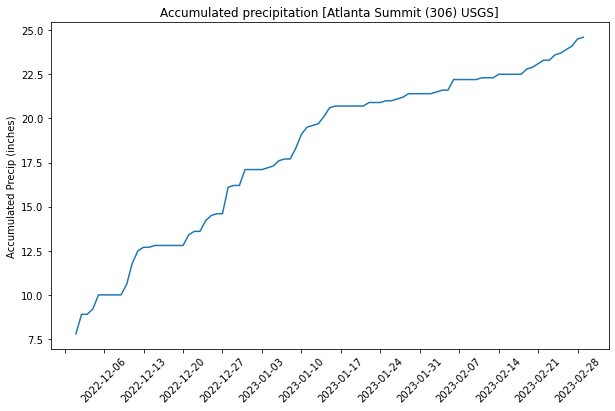

In [99]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df['Date'], df['Atlanta Summit (306) Precipitation Accumulation (in) Start of Day Values'])


# Set the x-axis ticker locator to be weekly
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())



plt.xticks(rotation=45)  # Rotate the x-axis tick labels for better readability
plt.title('Accumulated precipitation [Atlanta Summit (306) USGS]')
plt.ylabel('Accumulated Precip (inches)')
plt.savefig('acc_precip.png',dpi=300)
plt.show()